#PyTorch Intro - Tensory - Laboratorium

**Tensor** w bibliotece PyTorch jest specjalizowaną strukturą danych podobną do wielowymiarowej tablicy `ndarray` w bibliotece numpy. Na tensorach można wykonywać typowe operacje algebry liniowej oraz operacje specyficzne dla głębokiego uczenia jak na przykład automatyczne różniczkowanie (autograd).
Tensory wykorzystujemy do przechowywania przetwarzanych danych oraz parametrów (wag) modeli. Biblioteka PyTorch pozwala na efektywne przetwarzanie tensorów na CPU lub GPU.

##Przygotowanie środowiska
Upewnij się, że notatnik jest uruchomiony na maszynie z GPU. Jeśli GPU nie jest dostępne zmień typ maszyny (Runtime | Change runtime type) i wybierz T4 GPU.

In [4]:
!nvidia-smi

Sat Mar 15 13:37:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Biblioteka PyTorch (`torch`) jest domyślnie zainstalowana w środowisku COLAB.

In [2]:
import torch
import numpy as np

print(f"Wersja biblioteki PyTorch: {torch.__version__}")

Wersja biblioteki PyTorch: 2.6.0+cu124


Sprawdzenie dostępnego urządzenia GPU.

In [3]:
print(f"Dostępność GPU: {torch.cuda.is_available()}")
print(f"Typ GPU: {torch.cuda.get_device_name(0)}")

Dostępność GPU: True
Typ GPU: Tesla T4


##Zadania do wykonania

###Zadanie 1: Tworzenie tensorów
Wygeneruj tensor o pokazanej poniżej zawartości nie używając pętli. Wskazówka: Wykorzystaj funkcję `torch.full` i mechanizm indeksowania tensorów.

```
 1 2 1 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 2 1 1 1 1 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 1 1 1 1 2 1 1 1 1 2 1
 1 2 1 3 3 1 2 1 3 3 1 2 1
 1 2 1 3 3 1 2 1 3 3 1 2 1
 1 2 1 1 1 1 2 1 1 1 1 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 1 1 1 1 2 1 1 1 1 2 1
 1 2 1 3 3 1 2 1 3 3 1 2 1
 1 2 1 3 3 1 2 1 3 3 1 2 1
 1 2 1 1 1 1 2 1 1 1 1 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 1 1 1 1 2 1 1 1 1 2 1
```



In [10]:
import torch

# Tworzenie bazowego tensora wypełnionego jedynkami
tensor = torch.full((14, 13), 1)

# Ustawienie wartości 2 w odpowiednich miejscach
tensor[:, 1] = 2
tensor[:, -2] = 2
tensor[2, :] = 2
tensor[7, :] = 2
tensor[12, :] = 2

# Ustawienie wartości 3 w odpowiednich miejscach
tensor[4:6, 3:5] = 3
tensor[4:6, 8:10] = 3
tensor[9:11, 3:5] = 3
tensor[9:11, 8:10] = 3

print(tensor)

tensor([[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 1, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 1, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 1, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 3, 3, 1, 1, 1, 3, 3, 1, 2, 1],
        [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1]])


###Zadanie 2: Wartości własne macierzy
Utwórz dwuwymiarowy tensor $M$ o rozmiarach $20 \times 20$ zainicjalizowany losowymi wartościami o standardowym rozkładzie normalnym.
Następnie wyznacz wartości własne macierzy $
X = M D M^{-1} \, ,
$
gdzie
$$
\begin{align}
D =
\begin{bmatrix}
1 & 0 & 0 & \ldots & 0 & 0 \\
0 & 2 & 0 & \ldots  & 0 & 0 \\
\vdots &  & \ddots &  &  & \vdots \\
\vdots &  &  &  & 19 & 0 \\
0 & \ldots & \ldots & \ldots & 0 & 20
\end{bmatrix}
\end{align} \, .
$$
Nie używaj pętli. Macierz $D$ wygeneruj korzystając z funkcji `torch.diag`. Do wyznaczenia wektorów własnych wykorzystaj funkcję `torch.linalg.eig`.

In [26]:
print(torch.rand())


tensor([[0.0981, 0.3837],
        [0.0501, 0.9177],
        [0.4756, 0.0039],
        [0.0596, 0.8749],
        [0.2042, 0.2197]])


In [30]:
tensor = torch.rand(5,2)
print(tensor)
print(torch.diag(tensor, -1))

tensor([[0.4061, 0.2196],
        [0.6027, 0.4996],
        [0.0986, 0.5396],
        [0.5385, 0.0791],
        [0.7533, 0.6072]])
tensor([0.6027, 0.5396])


In [56]:
# definicja D
D = torch.diag(torch.tensor([x+1 for x in range (20)]))

##lub

D = torch.diag(torch.arange(1, 21))
print(D)

tensor([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0],
        [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0],
        [ 0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0],
        [ 0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0],
        [ 0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0],
        [ 0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0],
        [ 0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0],
        [ 

In [68]:
M = torch.rand(20, 20)

In [74]:
# Sprawdzenie czy .inverse i .linalg.inv dają to samo
M_inv = torch.inverse(M)
#print(M_inv)

M_inv2 = torch.linalg.inv(M)
#print(M_inv2)

if torch.allclose(M_inv, M_inv2):
  print("tak")
else:
  print("nie")


tak


In [78]:
X = M @ D.float() @ M_inv2
print(X)

tensor([[  2.6483, -31.1149,  33.1292, -10.8872, -32.0389,  10.0107, -35.2101,
          28.1790,  32.4444, -25.2647,  58.6337,  21.3455,  42.3133, -19.8310,
          31.6241,  26.5450, -17.1989, -59.0751,  12.9874,  -5.8052],
        [ -4.3882,  20.1883, -20.8058,  -1.0949,   8.1236,   7.1926,   7.4507,
          -4.2289,  -5.3745,   2.0151,  -5.3858, -12.5389,  -7.7548,  -1.5660,
          -0.3290,  -5.5834,  16.2700,  10.8179,  -3.7770,  -4.7292],
        [ -9.3875,  13.1897, -14.1586,   7.7187,  19.7248,   1.7286,  15.6425,
         -12.6782, -14.0980,  -3.9800, -18.2086, -15.4445, -13.7975,  10.1553,
          -3.2844,  -4.7639,   9.8360,  30.0157, -11.0899,  -9.0767],
        [ -3.0752,  33.5911, -43.2840,  22.2268,  29.0706,   1.0037,  32.4007,
         -21.0255, -32.5937,  22.7757, -46.5065, -33.4143, -31.4887,  12.0455,
         -20.2010, -24.5673,  30.4073,  47.7017, -14.6803,  -3.4775],
        [ -6.8197, -22.4816,  23.3999, -18.6618, -24.4571,  16.8338, -31.6047,
         

In [81]:
# wartości własne macierzy

w, v = torch.linalg.eig(X)
print("Wartości własne macierzy X:")
print(w)

Wartości własne macierzy X:
tensor([20.0001+0.j,  1.0000+0.j, 19.0000+0.j, 18.0001+0.j,  2.0001+0.j,  3.0000+0.j,
         3.9999+0.j, 16.9999+0.j,  4.9999+0.j, 15.9999+0.j, 14.9999+0.j, 13.9998+0.j,
         6.0000+0.j, 13.0000+0.j,  7.0001+0.j, 12.0000+0.j, 11.0000+0.j, 10.0003+0.j,
         9.0000+0.j,  7.9999+0.j])


###Zadanie 3: Porównanie czasów wykonywania operacji na CPU i GPU
Napisz kod który wyświetli wykres liniowy przedstawiający zależność czasu mnożenia dwóch macierzy kwadratowych $n \times n$ od ich rozmiaru $n$ dla działań wykonanych na CPU i na GPU.
Mierząc czas wykonania operacji na GPU pamiętaj aby przed rozpocząciem i przed zakończeniem pomiaru czasu wywołać polecenie `torch.cuda.synchronize()` które czeka na zakończenie obliczeń na GPU.


```
torch.cuda.synchronize()
start_time = time.time()
...
...
torch.cuda.synchronize()
end_time = time.time()
```



<ipython-input-2-6057ed1d5b4a>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


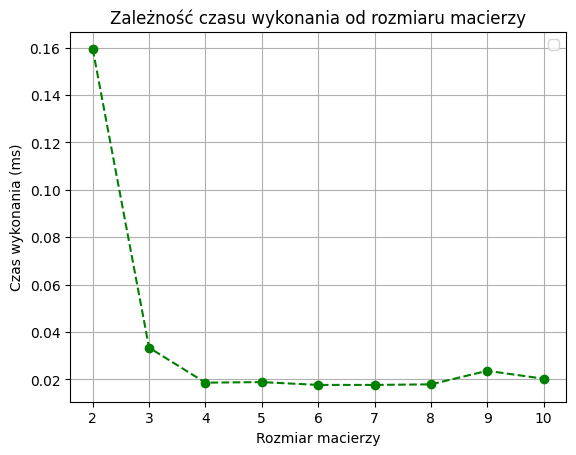

rozmiar macierzy: 2 x 2
czas wykonania: 0.1595020294189453 ms

rozmiar macierzy: 3 x 3
czas wykonania: 0.03337860107421875 ms

rozmiar macierzy: 4 x 4
czas wykonania: 0.018596649169921875 ms

rozmiar macierzy: 5 x 5
czas wykonania: 0.018835067749023438 ms

rozmiar macierzy: 6 x 6
czas wykonania: 0.017642974853515625 ms

rozmiar macierzy: 7 x 7
czas wykonania: 0.017642974853515625 ms

rozmiar macierzy: 8 x 8
czas wykonania: 0.017881393432617188 ms

rozmiar macierzy: 9 x 9
czas wykonania: 0.023603439331054688 ms

rozmiar macierzy: 10 x 10
czas wykonania: 0.020265579223632812 ms



In [2]:
# GPU
import time
import matplotlib.pyplot as plt
import torch

time_list = []
n = [x for x in range(2, 11)]

for _ in n:

    start_time = time.time()
    A = torch.rand(_, _)
    B = torch.rand(_, _)
    C = torch.matmul(A, B)
    end_time = time.time()

    time_list.append(end_time - start_time)

time_list_ms = [x * 1000 for x in time_list]
plt.plot(n, time_list_ms, 'go--')

plt.xlabel('Rozmiar macierzy')
plt.ylabel('Czas wykonania (ms)')
plt.title('Zależność czasu wykonania od rozmiaru macierzy')
plt.legend()
plt.grid()
plt.show()


for elem in n:
    print(f'rozmiar macierzy: {elem} x {elem}')
    print(f'czas wykonania: {time_list_ms[n.index(elem)]} ms')
    print()

<ipython-input-14-defb0d851f93>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


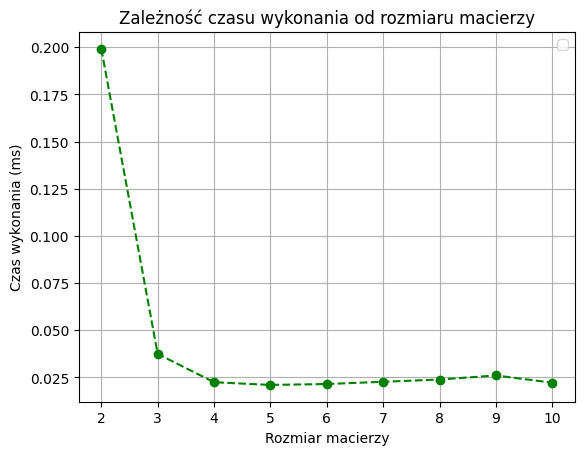

rozmiar macierzy: 2 x 2
czas wykonania: 0.1990795135498047 ms

rozmiar macierzy: 3 x 3
czas wykonania: 0.03743171691894531 ms

rozmiar macierzy: 4 x 4
czas wykonania: 0.022411346435546875 ms

rozmiar macierzy: 5 x 5
czas wykonania: 0.0209808349609375 ms

rozmiar macierzy: 6 x 6
czas wykonania: 0.021457672119140625 ms

rozmiar macierzy: 7 x 7
czas wykonania: 0.022649765014648438 ms

rozmiar macierzy: 8 x 8
czas wykonania: 0.02384185791015625 ms

rozmiar macierzy: 9 x 9
czas wykonania: 0.025987625122070312 ms

rozmiar macierzy: 10 x 10
czas wykonania: 0.022172927856445312 ms



In [14]:
# CPU
import time
import matplotlib.pyplot as plt
import torch

time_list = []
n = [x for x in range(2, 11)]

for _ in n:

    start_time = time.time()
    A = torch.rand(_, _)
    B = torch.rand(_, _)
    C = torch.matmul(A, B)
    end_time = time.time()

    time_list.append(end_time - start_time)

time_list_ms = [x * 1000 for x in time_list]
plt.plot(n, time_list_ms, 'go--')

plt.xlabel('Rozmiar macierzy')
plt.ylabel('Czas wykonania (ms)')
plt.title('Zależność czasu wykonania od rozmiaru macierzy')
plt.legend()
plt.grid()
plt.show()


for elem in n:
    print(f'rozmiar macierzy: {elem} x {elem}')
    print(f'czas wykonania: {time_list_ms[n.index(elem)]} ms')
    print()

###Zadanie 4 (opcjonalne): Konwencja sumacyjna Einsteina
Zapisz podane operacje korzystając z konwencji sumacyjnej Einsteina.

Wyznacz ślad (suma elementów na przekątnej) macierzy `M`.

In [3]:
M = torch.tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

In [6]:
slad = torch.einsum('ii->', M)
print(slad)

tensor(15)


In [ ]:
#Oczekiwany wynik: 15

Wyznacz wartość formy biliniowej
$z = \mathbf{x}^T \mathbf{A} \mathbf{y}$

In [8]:
x = torch.tensor([1, 2])
A = torch.tensor([[3, 4], [5, 6]])
y = torch.tensor([7, 8])

In [9]:
z = torch.einsum('i,ij,j->', x, A, y)
print(z)

tensor(219)


In [ ]:
#Oczekiwany wynik 219

Wyznacz ważoną sumę wektorów wierszowych macierzy `V` z wagami w wektorze `w`.
$$\mathbf{z}_j = \sum_i \mathbf{w}_i \mathbf{V}_{ij}$$




In [10]:
w = torch.tensor([0.2, 0.3, 0.5])
V = torch.tensor([[1, 2], [3, 4], [5, 6]], dtype=torch.float32)  # Shape: [3, 2]

In [11]:
z = torch.einsum('i,ij->j', w, V)
print(z)

tensor([3.6000, 4.6000])


In [ ]:
#Oczekiwany wynik [3.6000, 4.6000]

Dla trójwymiarowej macierzy `A` wyznacz sumę elementów po drugiej i trzeciej współrzędnej:
$$\mathbf{z}_i = \sum_{j,k} \mathbf{A}_{ijk}$$

In [13]:
A = torch.tensor(
    [[[1, 2], [3, 4], [5, 6]],
     [[2, 5], [1, 7], [1, 3]]]
    )
print(A.shape)

torch.Size([2, 3, 2])


In [14]:
z = torch.einsum('ijk->i', A)
print(z)

tensor([21, 19])


In [ ]:
#Oczekiwany wynik: [21, 19]